### Unsupervised Machine Learning
Assignment #3 <br>
Basic Sequential Clustering Algrorithm <br>
Michael Zwartz<br>

#### Technical Description
Basic Sequential Clustering (BSCA) is a very simple clstering method. Hence the "basic" in its name. In unsupervised machine learning clustering is a important technique to group together instances to sort new data or extract significant features. There are many variants of BSCA that change based on the user defined distance measurment used, threshold of dissimilarity, and maximum # of clusters. The main process for BSCA is to first find the distance between a cluster center and each instance. If that distance is greater than the user defined threshold and the maximum number of clusters has not been reached then BSCA will create a new cluster. If the distance is less than the threshold or the maximum number of clusters has been reached then BSCA will add that instance into the cluster and recalculate the center.

#### Design of Algorithm
There are only a few steps to the basic sequential clustering algorithm. 
1. Define the parameters for threshold of dissimilarity and maximum number of clusters. 
2. Iterate through each instance to determine the dissimilaity to each cluster. 
3. Assign that instance to a cluster. 
4. Create a plot displaying the clusters. 

A couple of notes with this program below. The clusters were created using dictionaries. The disctionaries were then converted into dataframes to create the images. This distance measure used between instances was eucleidan. 


#### Results
In the attached zip file there are 12 graphs that show the results from this program. Half of graphs show the 1 dimentional LDA data clusterd with 3 different thresholds of dissimilarity and 3 different number of clusters. The other half of the graphs plot the 2 dimentianal data reduces using PCA. Three of these graphs show different thresholds of dissimilarity and 3 show different number of clusters. <br>

Overall, changing the threshold of dissimilarity doesn't change the clusters much for this data set. For the 1D LDA clusters I started with alpha equal to 0.9, I decreased it to 0.5, then down to 0.000005, and up to 100000. I thought the larger number would make a significant change in the graphs becuase the LDA dimension is on the oreder of $1*10^{17}$. The images below show 1D ploted with two different alpha variables but the same graphs.

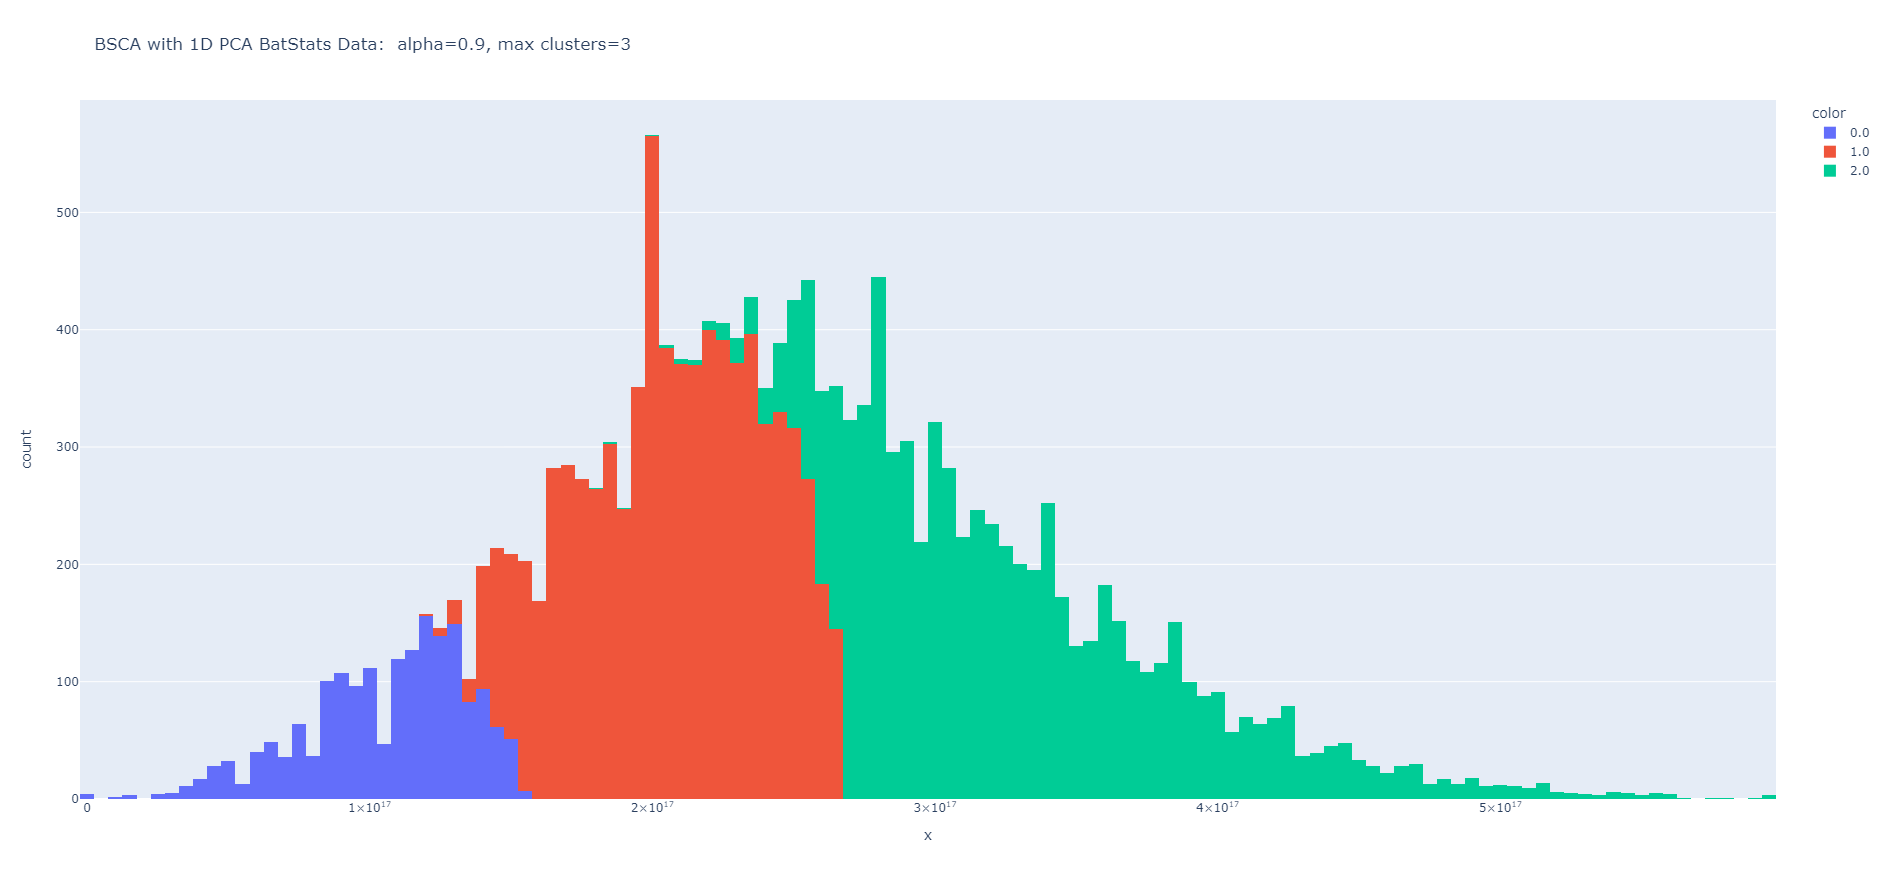

In [34]:
Image(filename='Graphs/1D-09-3.png')

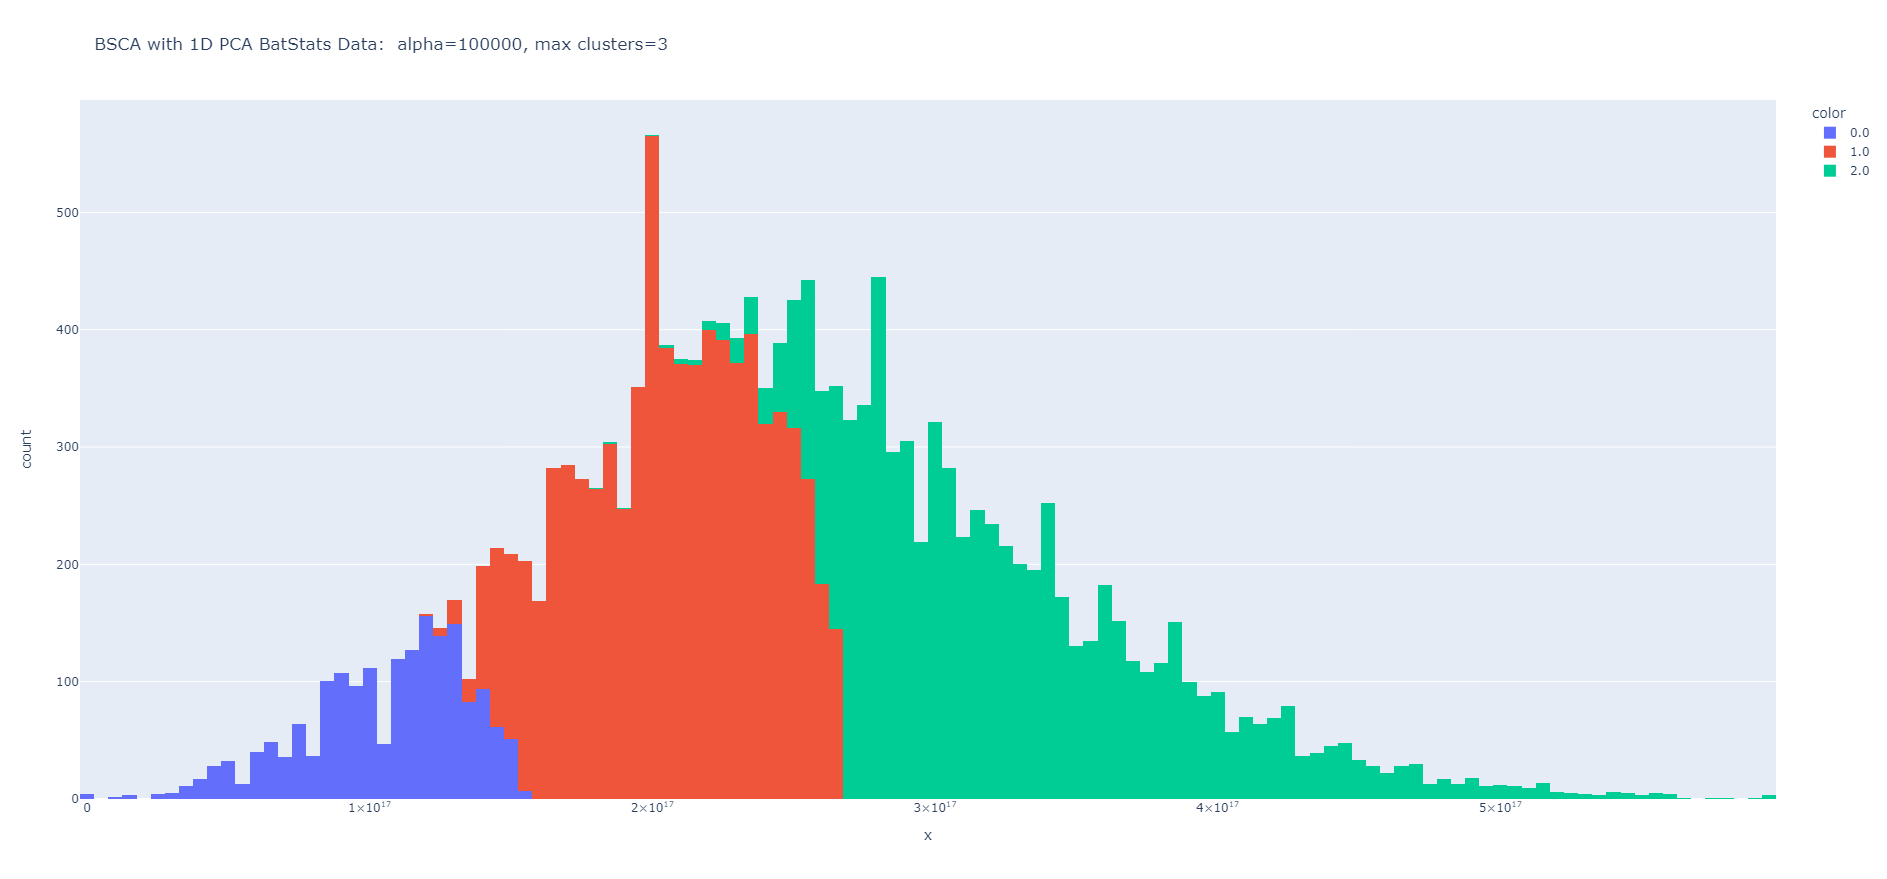

In [35]:
Image(filename='Graphs/1D-100-3.png')

For the 2D PCA reduced dimensions, changing alpha didn't change my results much either.Changing the number of clusters did show a difference in the graphs. In the two images below it shows how the clusters change when maximum 3 cluters is defined and maximum 5 clusters is defined. 

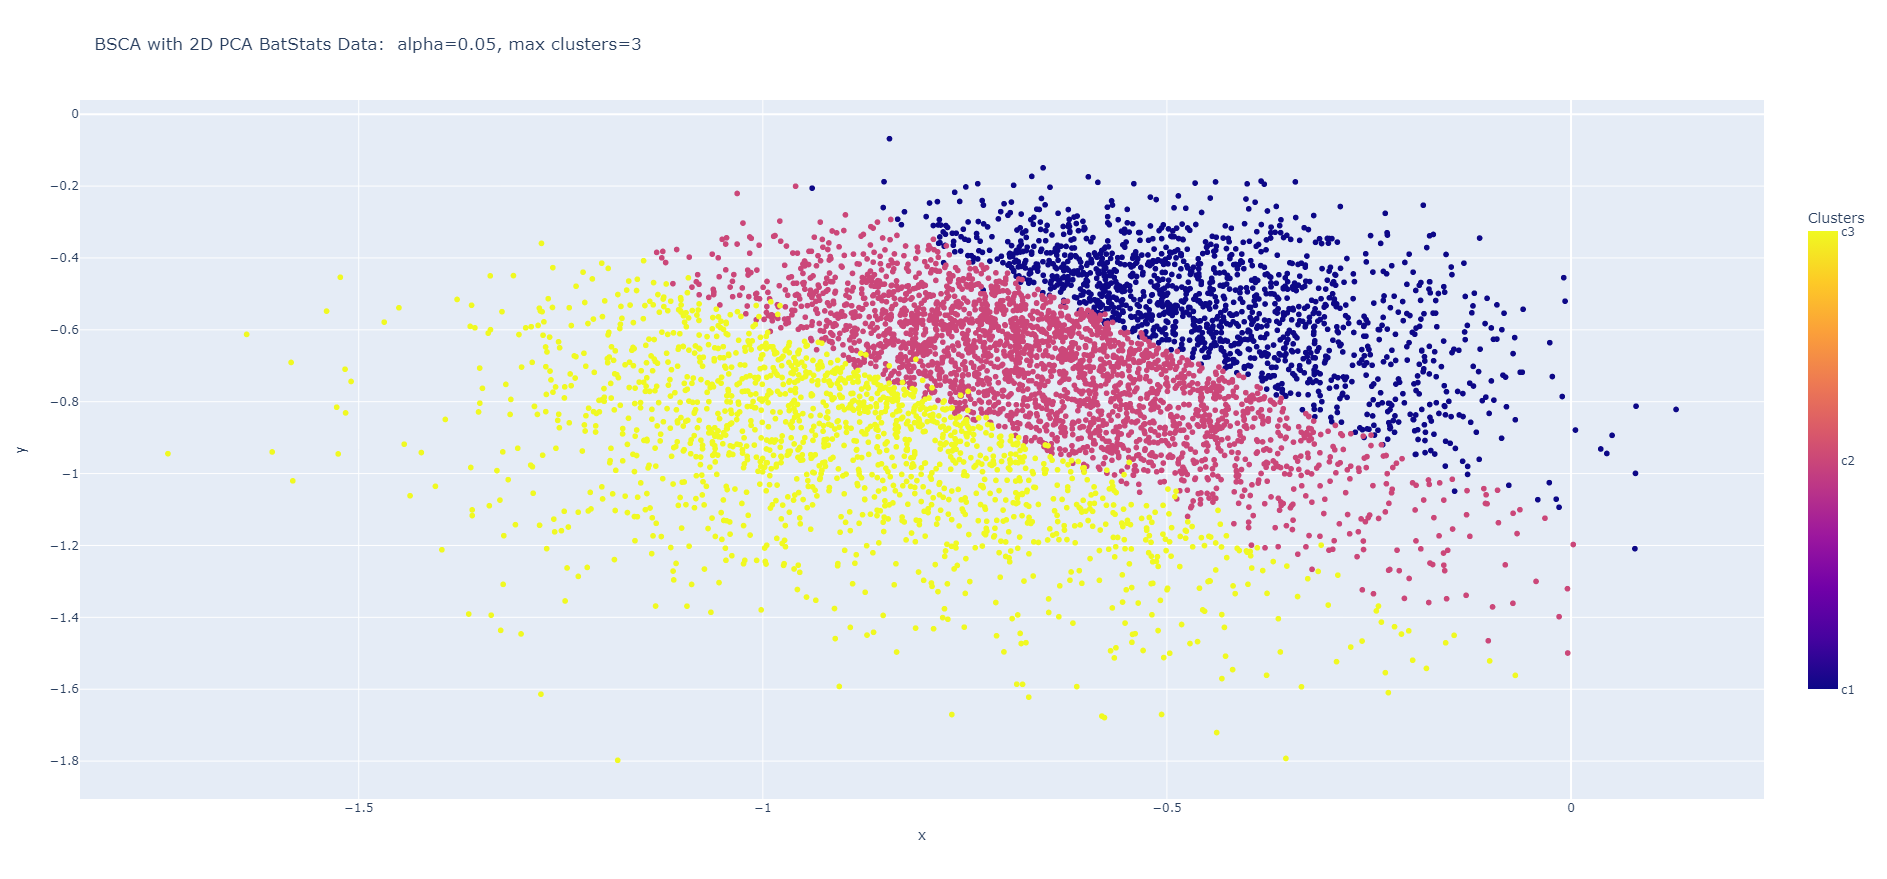

In [36]:
Image(filename='Graphs/2D-05-3.png')


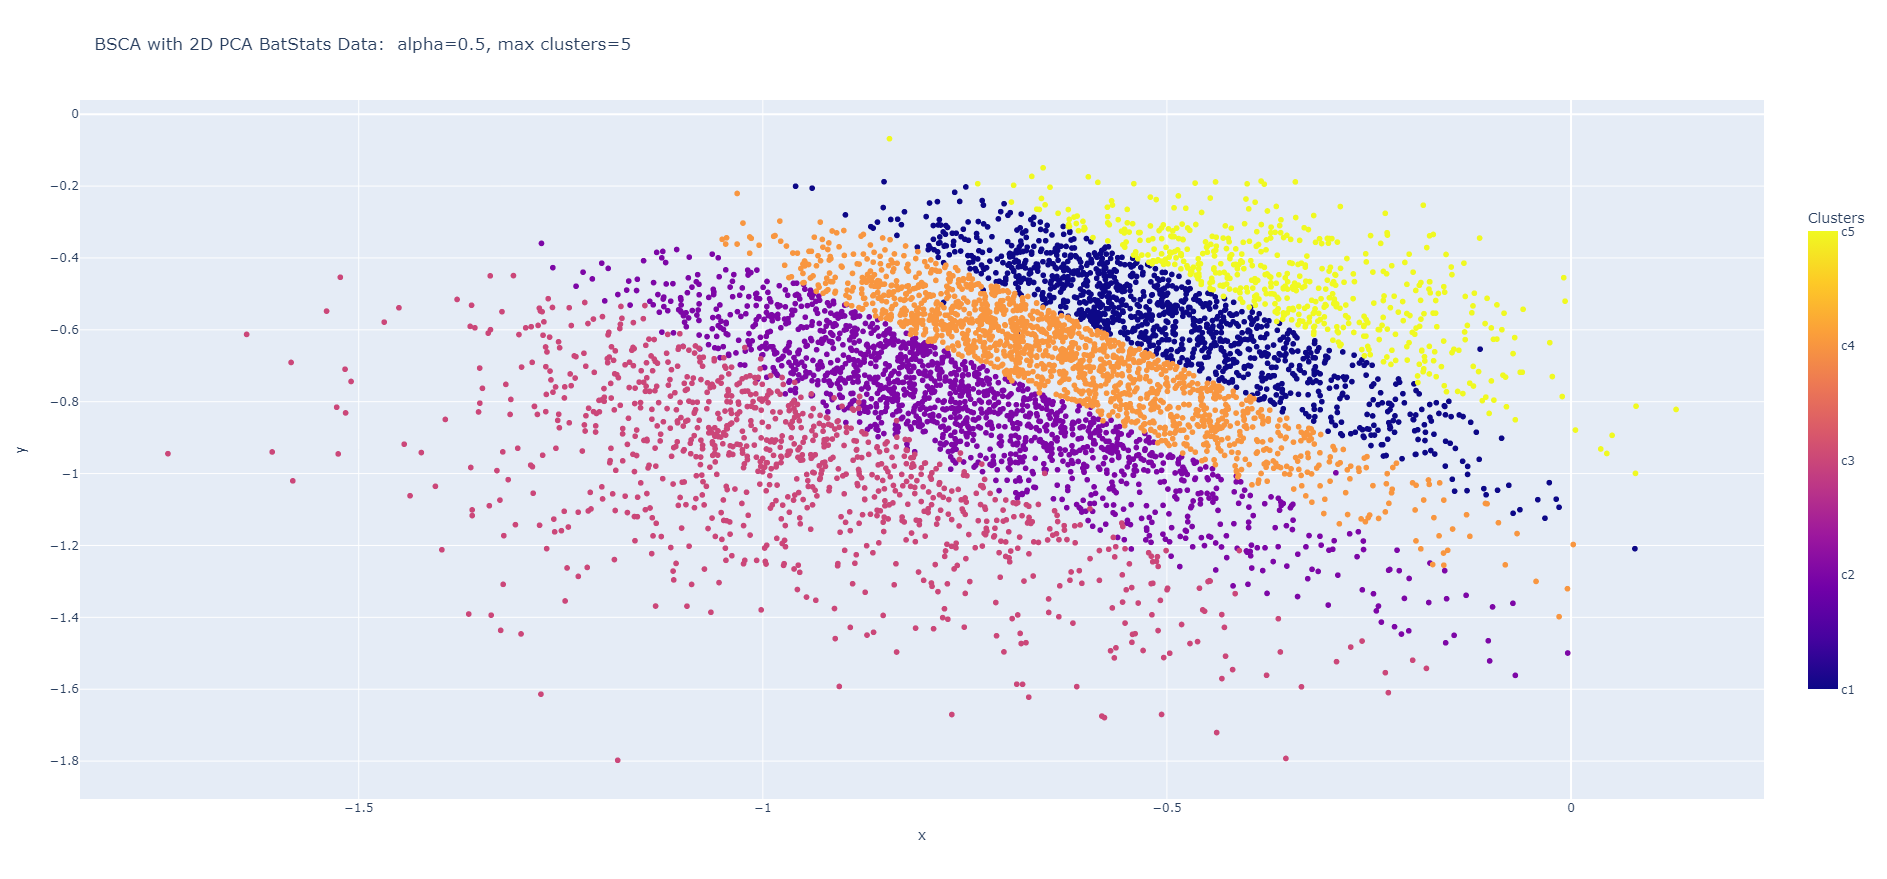

In [37]:
Image(filename='Graphs/2D-05-5.png')

#### Analysis 
The results from this clustering algorithm were not very surprising. I anticipated 3 cluters for the 1D data to be best becuae LDA factors in the class labels. When creating the data for the LDA algorithm I gave the data 3 labels. What is slighly surprising is the distribution of the clusters seen in the 1D graphs above. I anticiapted the middle section (red) to be the majority of the instances. This group represents the middle group of hitters. I anticiapted more hitters being close together and clumped in the middle group. The graph showing BSCA with 2D PCA data is more reflective of what I anticipated. We see in the graph with 3 clusters a higher concentration in the middle (pink) cluster than the other two clusters.

There were a couple of surprises in my data that I would say need further investigation. There are a handful of outliers in all of the graphs shown. I think the most obvious outlies can be seen in the last graph above (BSCA with 2D PCA BatStats Data: aplpha=0.5, max clusters = 5). Looking at the the 4th cluster (orange) there are a few blue dots scattered throughout. Those points need to be looked at more closely. 

#### Program

In [27]:
#import libraries
import pandas as pd
import numpy as np
from statistics import mean 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import Image

#import LDA and PCA data
from PCAandLDA import PCA_batStats, batStats1D_LDA1, batStats2D_PCA

#add 1D array to bat_stats dataframe
data = batStats1D_LDA1.astype(float)

data2D = batStats2D_PCA

Clustering with 1D Data from LDA

In [2]:
#USER PRARAMETERS DEFINED
#m = max number of clusters set by user
m=3
#a = alpha, threshold of dissimilarity set by user
a=1

#load data set
LDA_1D = data.to_frame(name="LDA1")

#t = counter, counts number of iterations or clusters created
t=1

#initialize cluster dictionary
clusters_LDA = dict(zip(range(m), [[] for i in range(m)]))

#assign the first data point to cluster 1
clusters_LDA[0].append(LDA_1D.LDA1[0])


#iterate through data points after the first one
for row in LDA_1D.LDA1[1:]:
#add at least 1 data point to each cluster   
#if counter is less than max clusters aka not all clusters have been instantiated
    c=0 
    currentclusters=t
    distance = dict(zip(range(currentclusters), [[] for i in range(currentclusters)]))
    
    for c in range(currentclusters):
        distance[c].append(abs(row-np.mean(clusters_LDA[c])))
    
    shortest_dist=min(distance.values())
    closest_cluster=list(distance.keys())[list(distance.values()).index(shortest_dist)]
    
    if t<m and shortest_dist[0] >a:
        print('cluster ' + str(c+1) + ' is made')
        clusters_LDA[currentclusters].append(row)
        t=t+1
    #after all clusters have at least one data point sort the rest of the data point by choosing cluster with closest centroid
    else:  
        clusters_LDA[closest_cluster].append(row)

#print cluster array
#clusters_LDA[c]


c_df=pd.DataFrame()
for c in clusters_LDA:
    for i in clusters_LDA[c]:
        c_df=c_df.append({'Value': i, 'Cluster': c}, ignore_index=True)





cluster 1 is made
cluster 2 is made


In [3]:
#create 1D Plot with clusters 
fig=go.Figure()

fig=px.histogram(x=c_df.Value, color=c_df.Cluster, 
               title="BSCA with 1D LDA BatStats Data:  alpha=" + str(a) + ", max clusters=" + str(m))

fig.update_layout(coloraxis_colorbar=dict(
    title="Clusters",
    tickvals=[0,1,2,3, 4],
    ticktext=["c1","c2","c3","c4", "c5"],
    lenmode="pixels", len=500,
))

#fig.add_trace(go.scatter(x=clusters[1], y=range(len(clusters[0]))))
fig.write_html('result1.html', auto_open=True)

Clustering with 2D Data from PCA

In [ ]:
#USER PRARAMETERS DEFINED
#m = max number of clusters set by user
m=2
#a = alpha, threshold of dissimilarity set by user
a=0.05

#define distance measurment
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

#load data set
PCA_2D = pd.DataFrame(data2D, columns = ['PCA1', 'PCA2'])#.sample(2000).reset_index()
#PCA_2D = PCA_2D[['PCA1', 'PCA2']]

#t = counter, counts number of iterations or clusters created
t=1

#initialize cluster dictionary
clusters_PCA = dict(zip(range(m), [[] for i in range(m)]))

#assign the first data point to cluster 1
clusters_PCA[0].append(PCA_2D.loc[0])

row = 1
while row < PCA_2D.shape[0]:
#add at least 1 data point to each cluster   
#if counter is less than max clusters aka not all clusters have been instantiated
    c=0 
    currentclusters=t
    distance = dict(zip(range(currentclusters), [[] for i in range(currentclusters)]))
    
    for c in range(currentclusters):
        #find distance for each cluster using euclidean distance
        distance[c].append(np.linalg.norm(PCA_2D.loc[row]-(np.mean(clusters_PCA[c]))))
    
    shortest_dist=min(distance.values())
    closest_cluster=list(distance.keys())[list(distance.values()).index(shortest_dist)]
    
    if t<m and shortest_dist[0] >a:
        print('cluster ' + str(c+1) + ' is made')
        clusters_PCA[currentclusters].append(PCA_2D.loc[row])
        t=t+1
    #after all clusters have at least one data point sort the rest of the data point by choosing cluster with closest centroid
    else:  
        clusters_PCA[closest_cluster].append(PCA_2D.loc[row])

    row = row + 1

#print cluster array
#clusters_PCA

c_df2=pd.DataFrame()
for c in clusters_PCA:
    for i in clusters_PCA[c]:
        c_df2=c_df2.append({'PCA1': i[0], 'PCA2': i[1], 'Cluster': c}, ignore_index=True)

c_df2.head()

In [17]:
#Create 2D plot with clusters
fig2=go.Figure()

fig2=px.scatter(x=c_df2.PCA1, y=c_df2.PCA2, color=c_df2.Cluster, 
               title="BSCA with 2D PCA BatStats Data:  alpha=" + str(a) + ", max clusters=" + str(m))

fig2.update_layout(coloraxis_colorbar=dict(
    title="Clusters",
    tickvals=[0,1,2,3, 4],
    ticktext=["c1","c2","c3","c4", "c5"],
    lenmode="pixels", len=500,
))

#fig.add_trace(go.scatter(x=clusters[1], y=range(len(clusters[0]))))
fig2.write_html('result2.html', auto_open=True)